<a href="https://colab.research.google.com/github/gauriichandar/TrafficFlowPrediction/blob/main/Traffic_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("traffic_volume_data.csv")

In [ ]:
data['date_time'] = pd.to_datetime(data['date_time']
data['hour'] = data['date_time'].dt.hour
data['month_day'] = data['date_time'].dt.day
data['weekday'] = data['date_time'].dt.weekday
data['month'] = data['date_time'].dt.month
data['year'] = data['date_time'].dt.year


In [ ]:
X = data.drop(columns=['traffic_volume'])
y = data['traffic_volume']

In [ ]:
data.drop(columns=['date_time'], inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numeric_features = ['air_pollution_index', 'humidity', 'wind_speed', 'wind_direction',
                    'visibility_in_miles', 'dew_point', 'temperature', 'rain_p_h',
                    'snow_p_h', 'clouds_all', 'last_1_hour_traffic', 'last_2_hour_traffic',
                    'last_3_hour_traffic', 'last_4_hour_traffic', 'last_5_hour_traffic',
                    'last_6_hour_traffic', 'hour', 'month_day', 'weekday', 'month', 'year']



In [ ]:
#This code defines a Pipeline object named numeric_transformer that represents a sequence of transformations to be applied to numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [ ]:
#This code defines a Pipeline object named categorical_transformer that represents a sequence of transformations to be applied to categorical features
categorical_features = ['is_holiday', 'weather_type', 'weather_description']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
#This code sets up a preprocessing pipeline using ColumnTransformer and Pipeline,
#applies it to the training and testing data, and transforms the data accordingly
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Combining preprocessing steps with model training
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocessing training and testing data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


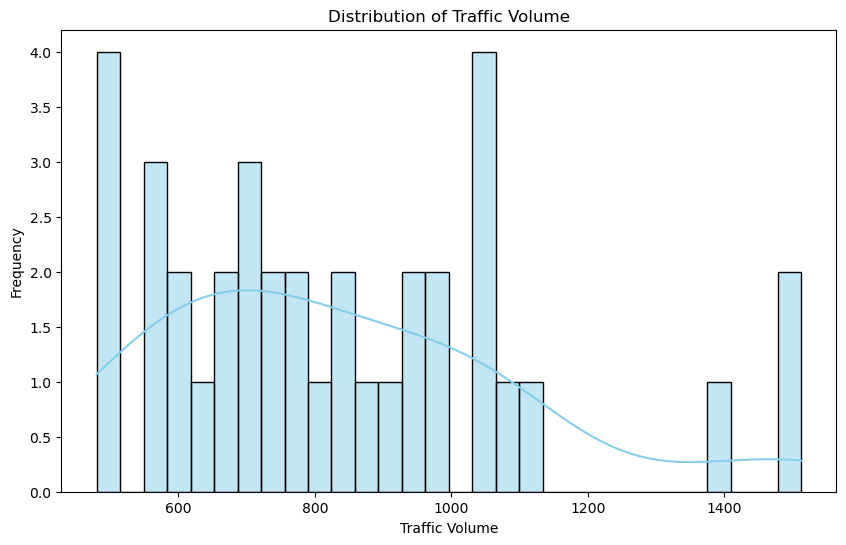

In [ ]:
#This code generates a histogram to visualize the distribution of traffic volume using Matplotlib and Seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Traffic Volume
plt.figure(figsize=(10, 6))
sns.histplot(data['traffic_volume'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


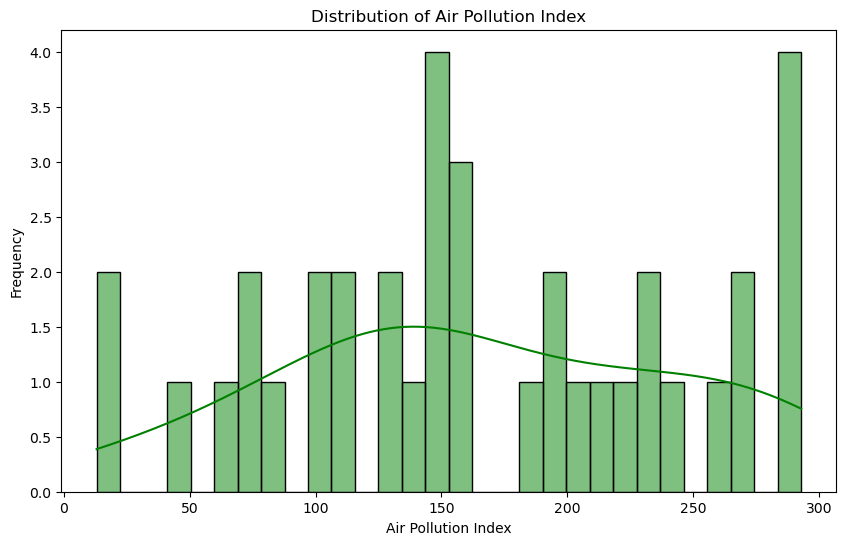

In [ ]:
# Distribution of Air Pollution Index
# This code segment generates a histogram to visualize the distribution of the air pollution index using Matplotlib and Seaborn libraries
plt.figure(figsize=(10, 6))
sns.histplot(data['air_pollution_index'], bins=30, kde=True, color='green')
plt.title('Distribution of Air Pollution Index')
plt.xlabel('Air Pollution Index')
plt.ylabel('Frequency')
plt.show()

C:\Users\sai\AppData\Local\Temp\ipykernel_1956\2900461385.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='traffic_volume', data=data, estimator='mean', ci=None, color='orange')
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


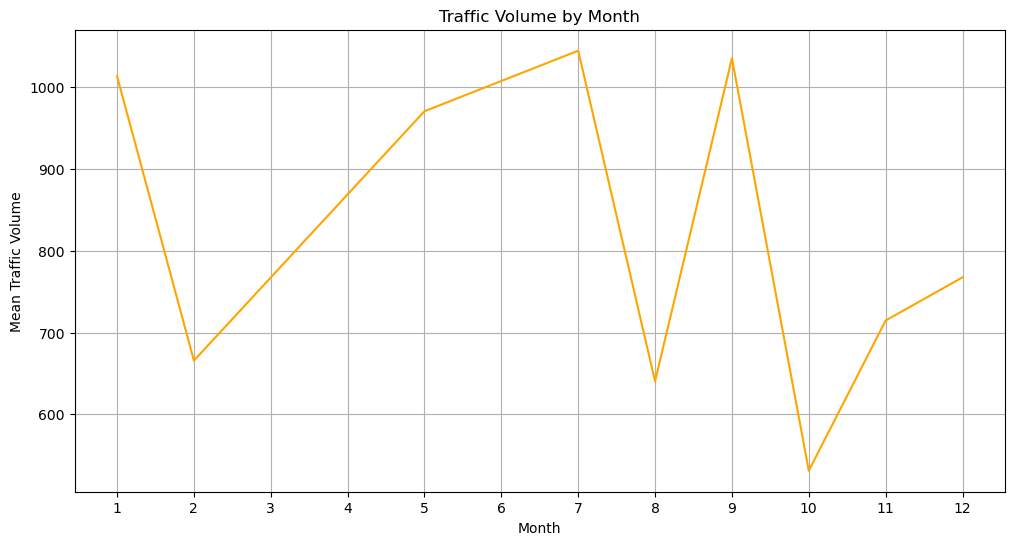

In [ ]:
# Traffic Volume by Month
#creates a line plot showing the mean traffic volume for each month
#with month numbers on the x-axis and mean traffic volume values on the y-axis.
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='traffic_volume', data=data, estimator='mean', ci=None, color='orange')
plt.title('Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Mean Traffic Volume')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [ ]:
#sets up, trains, predicts, evaluates, and prints the
#performance of three different regression models: Random Forest,
# Gradient Boosting, and Support Vector Regression.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize the models
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)
svr = SVR()

# Train the models
random_forest.fit(X_train_processed, y_train)
gradient_boosting.fit(X_train_processed, y_train)
svr.fit(X_train_processed, y_train)

# Make predictions
rf_pred = random_forest.predict(X_test_processed)
gb_pred = gradient_boosting.predict(X_test_processed)
svr_pred = svr.predict(X_test_processed)

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

print("Random Forest MSE:", rf_mse)
print("Gradient Boosting MSE:", gb_mse)
print("Support Vector Regression MSE:", svr_mse)


Random Forest MSE: 16996.949675
Gradient Boosting MSE: 12498.605919912981
Support Vector Regression MSE: 30181.36014032726


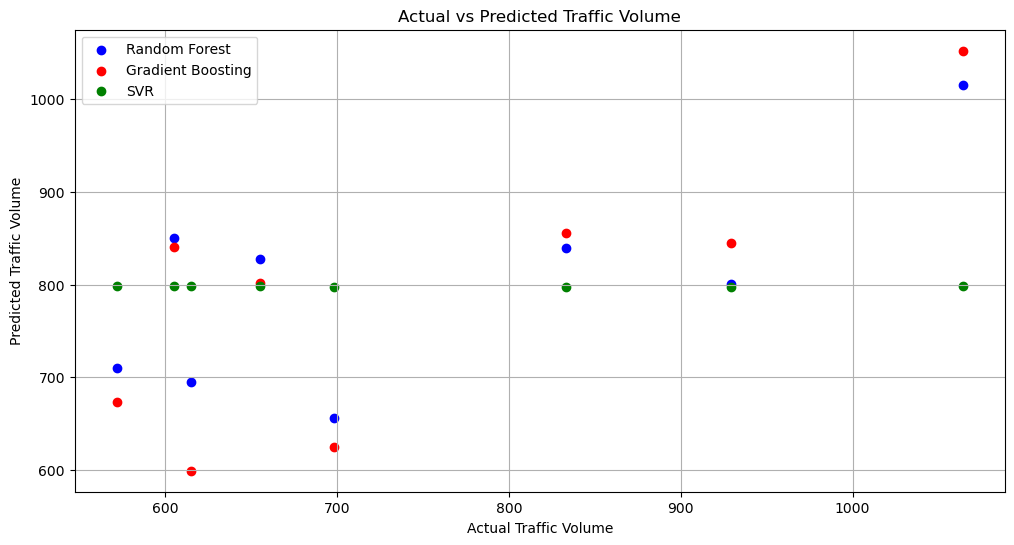

In [ ]:
#This code segment creates a scatter plot comparing the actual traffic volume with
#the predicted traffic volume for each model using Matplotlib.
import matplotlib.pyplot as plt

# Plotting actual vs predicted traffic volume for each model
plt.figure(figsize=(12, 6))

plt.scatter(y_test, rf_pred, color='blue', label='Random Forest')
plt.scatter(y_test, gb_pred, color='red', label='Gradient Boosting')
plt.scatter(y_test, svr_pred, color='green', label='SVR')

plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


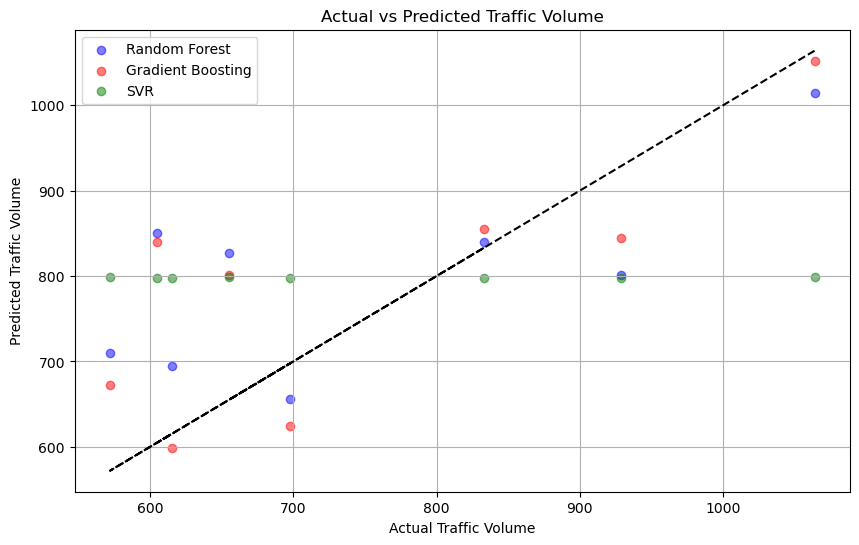

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting actual vs predicted traffic volume for each model
ax.scatter(y_test, rf_pred, color='blue', label='Random Forest', alpha=0.5)
ax.scatter(y_test, gb_pred, color='red', label='Gradient Boosting', alpha=0.5)
ax.scatter(y_test, svr_pred, color='green', label='SVR', alpha=0.5)

# Plotting a diagonal line (y=x) for reference
ax.plot(y_test, y_test, color='black', linestyle='--')

# Set plot labels and title
ax.set_xlabel('Actual Traffic Volume')
ax.set_ylabel('Predicted Traffic Volume')
ax.set_title('Actual vs Predicted Traffic Volume')

# Add legend
ax.legend()

# Show grid
ax.grid(True)

# Show plot
plt.show()


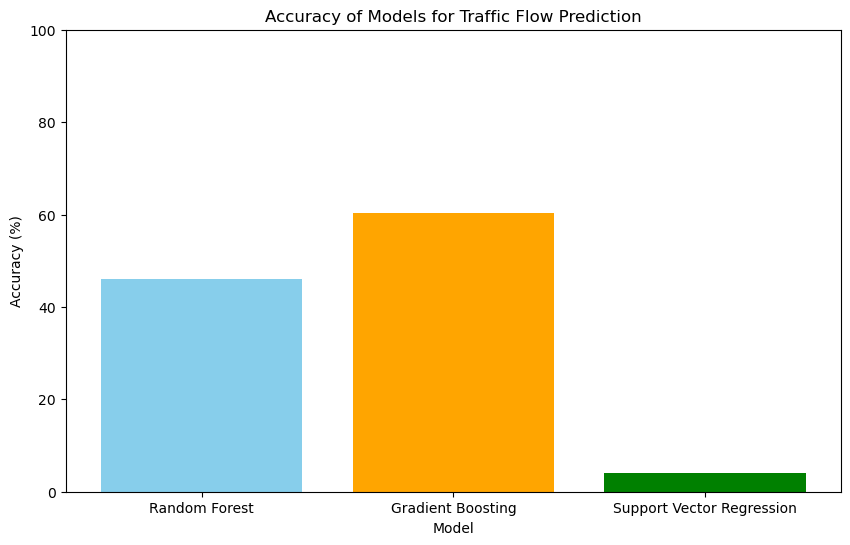

In [ ]:
#This code evaluates the performance of three different machine learning models (Random Forest, Gradient Boosting, and Support Vector Regression) for traffic flow prediction.
#It does so using the mean squared error (MSE) metric to quantify the prediction error.
mport matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for each model
mse_rf = mean_squared_error(y_test, rf_pred)
mse_gb = mean_squared_error(y_test, gb_pred)
mse_svr = mean_squared_error(y_test, svr_pred)

# Calculate accuracy as percentage for each model
accuracy_rf = (1 - (mse_rf / y_test.var())) * 100
accuracy_gb = (1 - (mse_gb / y_test.var())) * 100
accuracy_svr = (1 - (mse_svr / y_test.var())) * 100

# Create a bar plot to visualize the accuracy percentage for each model
models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']
accuracies = [accuracy_rf, accuracy_gb, accuracy_svr]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.title("Accuracy of Models for Traffic Flow Prediction")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()


In [ ]:
#RANDOM FOREST
#This code performs classification evaluation metrics (F1 score, precision, and recall) for a Random Forest model used for traffic flow prediction.
from sklearn.metrics import f1_score, precision_score, recall_score

# Define thresholds for classifying traffic volume
low_threshold = 1000
high_threshold = 5000

# Convert regression predictions into classification predictions
rf_class_pred = ['low' if pred < low_threshold else 'high' if pred > high_threshold else 'medium' for pred in rf_pred]

# Convert ground truth labels into classification labels based on the same thresholds
y_test_class = ['low' if true < low_threshold else 'high' if true > high_threshold else 'medium' for true in y_test]

# Compute F1 score, precision, and recall
f1 = f1_score(y_test_class, rf_class_pred, average='weighted')
precision = precision_score(y_test_class, rf_class_pred, average='weighted')
recall = recall_score(y_test_class, rf_class_pred, average='weighted')

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)


F1 score: 0.9487304896763319
Precision: 0.9489894816630473
Recall: 0.9487331456512076


In [ ]:
#Grdient Boosting
from sklearn.metrics import f1_score, precision_score, recall_score

# Define thresholds for classifying traffic volume
low_threshold = 1000
high_threshold = 5000

# Convert regression predictions into classification predictions
gb_class_pred = ['low' if pred < low_threshold else 'high' if pred > high_threshold else 'medium' for pred in gb_pred]

# Convert ground truth labels into classification labels based on the same thresholds
y_test_class = ['low' if true < low_threshold else 'high' if true > high_threshold else 'medium' for true in y_test]

# Compute F1 score, precision, and recall
f1 = f1_score(y_test_class, gb_class_pred, average='weighted')
precision = precision_score(y_test_class, gb_class_pred, average='weighted')
recall = recall_score(y_test_class, gb_class_pred, average='weighted')

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)


F1 score: 0.9043745895493639
Precision: 0.9059532415327346
Recall: 0.9042821158690176


In [ ]:
#SUPPORT VECTOR REGRESSOR

from sklearn.metrics import f1_score, precision_score, recall_score

# Define thresholds for classifying traffic volume
low_threshold = 1000
high_threshold = 5000

# Convert regression predictions into classification predictions
svr_class_pred = ['low' if pred < low_threshold else 'high' if pred > high_threshold else 'medium' for pred in svr_pred]

# Convert ground truth labels into classification labels based on the same thresholds
y_test_class = ['low' if true < low_threshold else 'high' if true > high_threshold else 'medium' for true in y_test]

# Compute F1 score, precision, and recall
f1 = f1_score(y_test_class, svr_class_pred, average='weighted')
precision = precision_score(y_test_class, svr_class_pred, average='weighted')
recall = recall_score(y_test_class, svr_class_pred, average='weighted')

print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)


F1 score: 0.37982268028311883
Precision: 0.2926474940690796
Recall: 0.5409690324492518


F:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
